In [50]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
data = pd.read_csv('./datasets/train.csv', header=None)
data.shape

(120000, 3)

In [5]:
data = data.rename(columns={0:'category', 1:'title', 2:'content'})

In [6]:
data.head()

,category,title,content
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [7]:
result = pd.concat([data.isnull().sum(),data.isnull().mean()*100],axis=1)
result = result.rename(index=str,columns={0:'Missing count',1:'Missing %'})
result.head()

,Missing count,Missing %
category,0,0.0
title,0,0.0
content,0,0.0


In [8]:
def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')  
    return ReviewText
data['title'] = preprocess(data['title'])

In [14]:
data['content'] = preprocess(data['content'])

In [9]:
data.head()

,category,title,content
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [15]:
data['review_len'] = data['content'].astype(str).apply(len)
data['word_count'] = data['content'].apply(lambda x: len(str(x).split()))

In [12]:
data.head()

,category,title,content,polarity,review_len,word_count
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",-0.083333,49,9
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,0.000000,51,6
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,0.000000,47,7
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,0.083333,60,9
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",0.136364,73,13


In [21]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


In [45]:

common_words = get_top_n_words(data['content'], 20)

df1 = pd.DataFrame(common_words, columns = ['content' , 'Count'])
x = list(df1.content.values)
y = list(df1.Count.values)

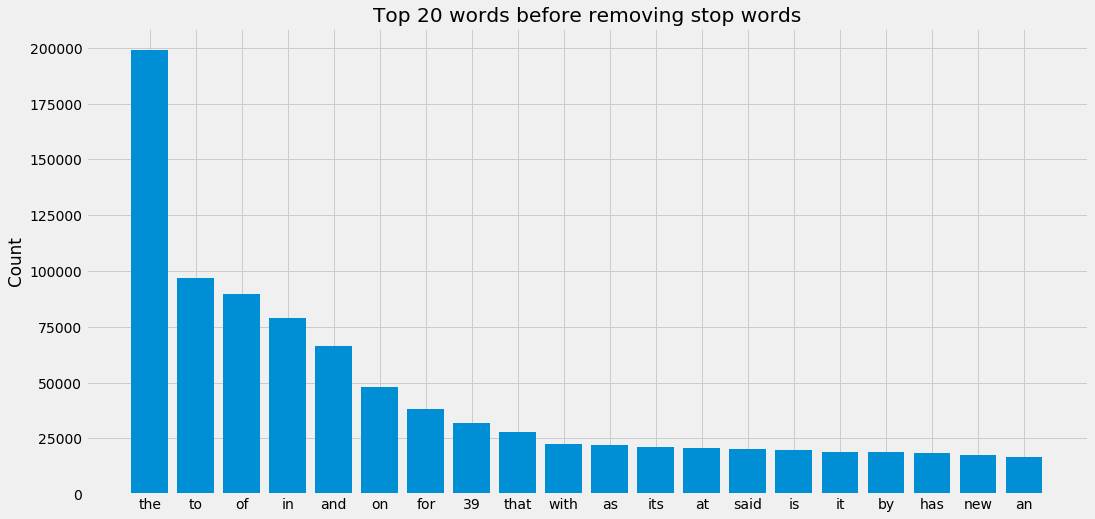

In [52]:
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(x, y);
ax.set_xticks(x);
ax.set_xticklabels(x);
ax.set_ylabel('Count');
ax.set_title('Top 20 words before removing stop words');
plt.show();

In [53]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [54]:
common_words = get_top_n_bigram(data['content'], 20)
df3 = pd.DataFrame(common_words, columns = ['content' , 'Count'])
x2 = list(df3.content.values)
y2 = list(df3.Count.values)

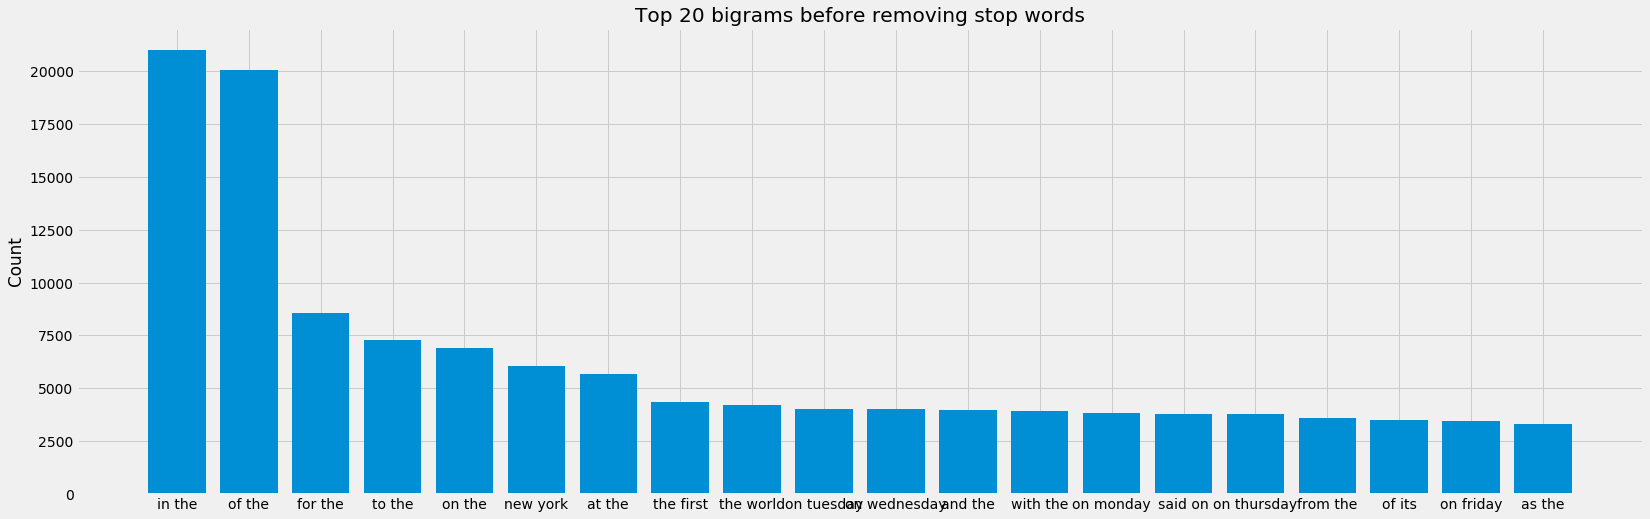

In [57]:
fig, ax = plt.subplots(figsize=(25,8))
ax.bar(x2, y2);
ax.set_xticks(x2);
ax.set_xticklabels(x2);
ax.set_ylabel('Count');
ax.set_title('Top 20 bigrams before removing stop words');
plt.show();